In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sys
!{sys.executable} -m pip install requests
import requests

## Introduction

Every year, the best picture nominees at the Oscar Awards seem to mostly be tear-jerking, serious dramas. We rarely see our favorite superhero flick or Will Ferrel movie in contention. Does the data back this observation up? In this report I investigated the relationship between critical reviews of a movie, sourced from Rotten Tomatoes, and the movie's genre. My hypothesis was that dramas are more likely to be rated highly by critics, whereas action movies and comedies are likel to be rated lower. I did not make a hypothesis for the rest of the genres. I found that dramas are indeed more likely to be rated highly by critics, while action movies are more likely to be rated poorly. However whether a movie is a comedy was found to be statistically insignificant on its rating. 


## Data Description

In this project I will be using two data sets. The first is a dataset I pulled from the Open Movie Database API. The second is called IMDB Movies Dataset, and is a publically available dataset of over 14000 movies on Kaggle. I am joining elemenents from both of these datasets on a common movie ID column to create a dataframe with several variables. I will examine these variables' correlation with a movie's Rotten Tomatoes score.

The dataset could also be used to examine the correlation between any other two variables, such as year and genre, or box office and total user reviews submitted. The Kaggle dataset was originally created and cleaned to be used in a machine learning model, although the cleaning was not thorough. I will expand upon this in the Dataset Preprocessing section.

#### DATA FUNDING/POTENTIAL BIASES

The owner of the OMDb API is not affiliated in any way with IMDb. He manages the service via donations and payments from patreon, with come with perks such as unlimited API access. There should be no vested interests that would cause the data to be biased. The Kaggle dataset generated the data for a Machine Learning competition, and posted it on Kaggle so others could use it. The data was scraped directly from the IMDb website, and is only used for facts about the movie, such as genre, title, and year of publication. Again, there should be no bias resulting from that.

#### DATA COMPOSITION

The data I am using contains several variables of a movie I will examine. Each row is one instance of a movie or episode, and there are around 14500 total instances. The relevant columns are:

"tid" - The internal ID of the movie on iMDB. This column is shared by both datasets
"rt_score" - The score of the movie/episode on rotten tomatoes

The rest of the relevant coluns are binary dummy columns that indicate which genre(s) the movie/episode is.

#### DATA COLLECTION PROCESS:

The dataset from Kaggle was a simple click to download. I then loaded the csv into a pandas dataframe, To pull all of the necessary data out of the Open Movies Database API, I looped through the dataframe, running an API call on each "tid" entry and pulling the relevant information into a local list. The API limits non-paid users to 1000 calls per email address per day, so I only used the first 1000 columns of the Kaggle dataset for this project. I could have signed up for the API with more email addresses, or I could have extracted the data over a matter of weeks, but I found that 1000 rows was enough data to make statistically significant conclusions. The Kaggle database was not ordered in any way, so the first 1000 rows are as random as any 1000 rows in the dataset.

#### DATASET PREPROCESSING:

The data form the API came in the form of a JSON file, with most values represented as strings, even the numbers. I had to convert several fields, including the rotten tomatoes percentage scores, into integers by removing percentage signs and quotation marks. The Kaggle dataset was pre-cleaned for machine learning, but not thoroughly. For example, many movie titles took up several columns, which threw off the rest of the entries in the row. I looped through the dataset and deleted all of these rows before I joined it with the API data. The final dataset contains 911 columns. All of the preprocessing was done in a Jupyter Notebook, which can be found in this repository.

#### POTENTIAL PROBLEMS

The only potential problem with the Kaggle dataset is that the initial poster of the dataset did not describe in detail their method for scraping the data from iMDB. This means that in theory it is possible that the Kaggle dataset is not a truly random sampling of movies, which might throw off the report's conclusions about the data. While I couldn't unearth the exact process of the data, I examined the distribution of genres and scores, and didn't find much out of the ordinary, so I decided the sample was random enough to proceed with the report.

#### LINKS:

The links to the API and the Kaggle data can be found here:
http://www.omdbapi.com/
https://www.kaggle.com/orgesleka/imdbmovies

The post-processed data I used in this analysis, along with the source code where the processing happened, can be found in the repository linked at the end of this report


## Data Analysis

First I loaded the post-process data into a csv file. Here are 5 sample rows from the data set:

In [3]:
movies = pd.read_csv("final_data.csv")
movies.head()

,rt_rating,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,...,Short,Sport,TalkShow,Thriller,War,Western,asdf,untitled,Unnamed: 46,Unnamed: 47
0,100,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550,3240,1921,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,100,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319,5700,1925,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,97,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007,9180,1927,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,93,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521,6420,1926,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,98,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057,5220,1931,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


Each row in the dataset corresponds to one movie or episode. While the dataset has a fair amount of information, this report only concerns the genre columns and the rt_rating column. The genres columns are formatted as dummy columns, which means a row will have a 1 in the column if it is of that genre, and a 0 if it doesn't. A movie can be tagged as more than one genre. To get an idea of the genre distribution, I summed each column and printed the results, then included a bar chart with the 5 most common genres. These genres, which include the three my hypothesis addresses, are the ones I will be focusing on for the rest of the report.

{'Action': 153, 'Adult': 0, 'Adventure': 190, 'Animation': 39, 'Biography': 76, 'Comedy': 158, 'Crime': 175, 'Documentary': 1, 'Drama': 588, 'Family': 47, 'Fantasy': 64, 'FilmNoir': 30, 'GameShow': 0, 'History': 69, 'Horror': 47, 'Music': 14, 'Musical': 6, 'Mystery': 105, 'News': 0, 'RealityTV': 0, 'Romance': 104, 'SciFi': 89, 'Short': 0, 'Sport': 31, 'TalkShow': 0, 'Thriller': 152, 'War': 78, 'Western': 32}


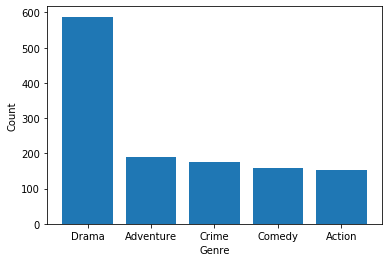

In [4]:
from collections import Counter

genres = movies.loc[:, "Action":"Western"] #Select all of the genre dummy columns
count_vals = {}
avg_vals = {}
for col in genres.columns:
    count_vals[col] = genres[col].sum()
    avg_vals[col] = movies.loc[movies[col] == 1]["rt_rating"].mean()
print(count_vals)


mostCommon =  dict(Counter(count_vals).most_common(5)) #Select the five genres with the highest count
plt.bar(mostCommon.keys(), mostCommon.values())
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

    

This chart shows that drama is the most common genre, with roughly 2/3 of movies falling within that category. After a large gap, Crime, Comedy, Adventure, and Action are all close, each with a count between 130 and 170.

Next, I wanted to get an idea of the distribution of Rotten Tomatoes ratings. The following histogram shows the distribution of Rotten Tomatoes ratings across all movies in the dataset.

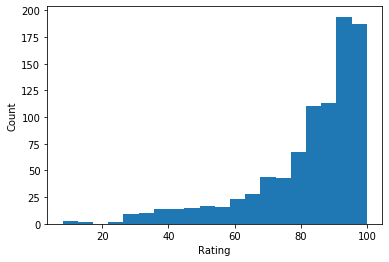

In [5]:
plt.hist(movies["rt_rating"], bins = 20)
plt.ylabel("Count")
plt.xlabel("Rating")
plt.show()

We see here that as ratings grow higher, their frequency grows exponentially. This will be useful later in the report. For now, to get a rough understanding of which genres do better on average, I plotted the average ratings for the five most common genres on a bar chart and compared them to the average value for the entire dataset

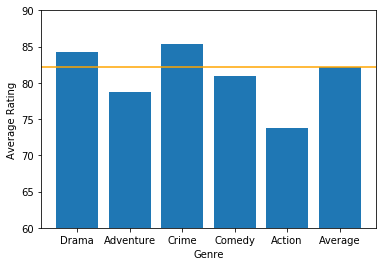

Mean rotten tomato rating:  82.13282107574095


In [6]:
mostCommon_avgs = {}
for key in mostCommon:
    mostCommon_avgs[key] = avg_vals[key] #Get the average values for the five most common genres
    
mostCommon_avgs["Average"] = movies["rt_rating"].mean() #Add a bar for the average

plt.bar(mostCommon_avgs.keys(), mostCommon_avgs.values())
plt.axhline(movies["rt_rating"].mean(), color = "orange")
plt.ylim(60, 90)
plt.ylabel("Average Rating")
plt.xlabel("Genre")
plt.show()

print("Mean rotten tomato rating: ", movies["rt_rating"].mean())

As I expected, the average rating for dramas is two points higher than the average for the dataset as a whole, and a full ten points higher than action movies. Unexpectedly, comedies came in just one point below average. My hypothesis predicted they would be lower rated on average, closer to action movies.

Next, I ran a linear regression model on each of these genres. Because there are only two possible x values, the slopes of the resulting trendlines will not give us much more information than examining the means did. However, it tells us the amount of points that are added or subtracted to the expected value of a movie's Rotten Tomatoes rating based on its genre. It also gives us a score for goodness of fit, which will be useful in evaluating the significance of the model.

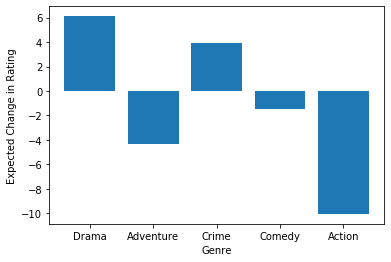

r^2 score for Drama: 0.027310603041648895
r^2 score for Adventure: 0.009971789521647567
r^2 score for Crime: 0.007704353061665613
r^2 score for Comedy: 0.0010440930634726397
r^2 score for Action: 0.04510673333034887


In [7]:
lin_reg = {}
r2_scores = {}
def runLinearRegression(x, y):
    return LinearRegression().fit(movies[[y]], movies[[x]])
    

for col in mostCommon.keys(): 
    model = runLinearRegression("rt_rating", col)
    lin_reg[col] = model.coef_[0][0] #Populate one dictionary with the regression line slopes for each genre               
    r2_scores[col] = model.score(movies[[col]], movies[["rt_rating"]]) #Populate another with the r^2 scores
        

plt.bar(lin_reg.keys(), lin_reg.values())
plt.ylabel("Expected Change in Rating")
plt.xlabel("Genre")
plt.show()

for score in r2_scores:
    print("r^2 score for " + score + ": " + str(r2_scores[score]))



According to this model, a movie's expected Rotten Tomatoes rating goes up nearly six points when it's a drama, down nine points when it's an action movie, and down just one point when it's a comedy.

## Evaluation of Significance

I first evaluated the significance of the model for dramas. The following scatter plot shows the linear approximation for dramas, with jitter applied to the x axis to make the individual points more visible. The first group of points represents non-drama movies, and the second group represents dramas.


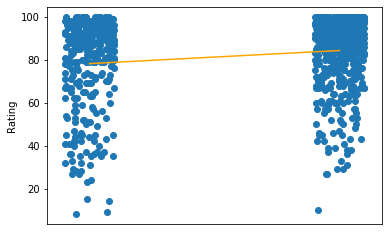

R^2:  0.027310603041648895
Slope:  6.10566858322276


In [8]:
import random
def jitter(list_, coef): #Change values of points at random to increase visibility
    ret = []
    for i in list_:
        ret.append(i + (random.uniform(-1, 1) * coef))
    return ret

drama_model = runLinearRegression("rt_rating", "Drama")
plt.scatter(jitter(movies["Drama"], 0.1), movies["rt_rating"])

#Get the endpoints for the regression line
end1 = drama_model.intercept_
end2 = end1 + drama_model.coef_[0][0]

plt.plot([0, 1], [end1, end2], color = "orange")
plt.ylabel("Rating")
plt.xticks([])
plt.show()

print("R^2: ", drama_model.score(movies[["Drama"]], movies[["rt_rating"]]))
print("Slope: ", drama_model.coef_[0][0])


Although there is a positive correlation between Dramas and rotten tomatoes scores, the $r^2$ value seems quite lower than we might expect, with only 2.7% of the observed error being explained by the linear model. The scatter plot of values demonstrates why this is. There are only two possible x values (before jittering is applied), but the range of ratings is quite high, so many points fall well outside the line.

To see whether this $r^2$ value is significant, I compared it to the $r^2$ values of randomly generated samples. To do this, I first had to find out the frequencies that rating values occur, so I could generate realistic samples. Whether a movie is a genre or not is a simple uniform distribution. Coming up with a frequency for the ratings was a little harder. Let's take a look at the distribution again.

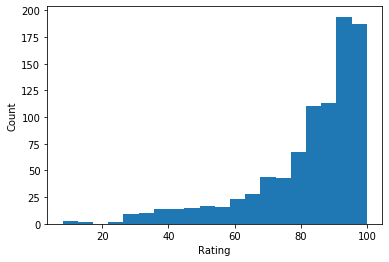

In [9]:
plt.hist(movies["rt_rating"], bins = 20)
plt.ylabel("Count")
plt.xlabel("Rating")
plt.show()

As we noted before, as the ratings increase, their frequency increases exponentially. With this in mind, I chose to mimic this distribution using the expression $100 - $random.uniform(0, 10)$^2$. This created the following distribution of ratings:

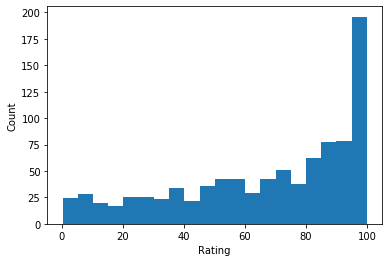

In [10]:
def random_regression(n, freq, print_): #Generate a random sample of a specified size and frequency
    x = np.zeros(n)
    y = np.zeros(n)
    for i in range(n):
        if(random.uniform(0, 1) < freq): #label a proportion of the sample equal to freq with the specified genre
            x[i] = 1
        y[i] = y[i] + 100 - (random.uniform(0, 10)**2) #mimic the exponenitial distribution of the ratings
    if(print_): #Show the histogram. Otherwise, the method just returns the score
        plt.hist(y, bins = 20)
        plt.ylabel("Count")
        plt.xlabel("Rating")
        plt.show()
    else:
        model = LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1, 1))
        return model.score(x.reshape(-1, 1), y.reshape(-1, 1))

movies_length = len(movies)
random_regression(movies_length, 0.5, True)



Although the match is not perfect, the general shape of the graph is similar enough that the random samples should be realistic. When we combine sampling from these two frequencies, we can generate a realistically distributed set of randomly generated movies. I then create 1000 of these samples, found their $r^2$ scores and mapped them into a histogram

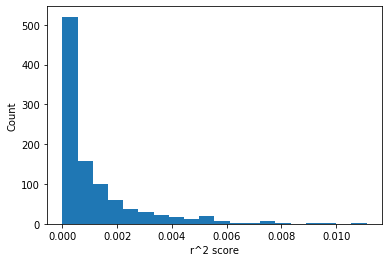

In [11]:
def randomScores(freq): #Generate the r^2 scores of n = movies_length random samples and plot them.
    scores = np.zeros(1000)
    for i in range(len(scores)):
        scores[i] = random_regression(movies_length, freq, False)

    plt.hist(scores, bins = 20)
    plt.ylabel("Count")
    plt.xlabel("r^2 score")
    plt.show()

def getFreq(genre):#Return the frequency at which a certain genre appears in the whole dataset
    return genres[genre].sum()/movies_length

randomScores(getFreq("Drama"))

The largest outliers on this histogram appear around 0.011. The actual observed $r^2$ value was 0.02, which falls well outside the expected range that can be accounted for by randomness. Therefore, the positive correlation between a movie being a drama and its Rotten Tomatoes ratings is statistically significant.

I ran the same analysis for the action genre. The only difference in the randomly generated samples will be that only roughly one out of eight movies is an action movie. I changed the distribution of the genre label to reflect this.

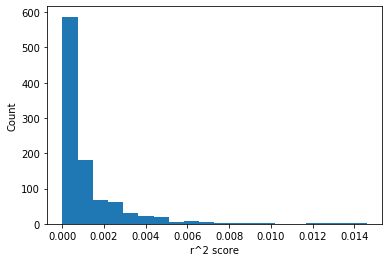

In [12]:
randomScores(getFreq("Action"))

Like the first set of random samples, the highest $r^2$ scores in the randomly generated range are around 0.014, which is much less than the 0.037 $r^2$ score we observed in the real data set for action movies. This means that the negative correlation between action movies and Rotten Tomatoes ratings is also statistically significant. Lastly, I ran the same analysis for comedies.

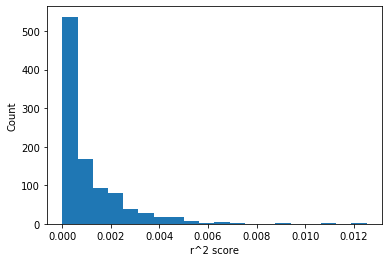

In [13]:
randomScores(getFreq("Comedy"))

The $r^2$ score for comedy is much lower than that of action and drama as just 0.0007. This falls well into the range of values that randomness could account for, meaning the correlation between comedies and Rotten Tomatoes ratings is statistically insignificant.

## Conclusion

Going into this analysis, I hypothesized that there was a statistically significant positive correlation between a movie being a drama and its Rotten Tomatoes rating. I also hypothesized that there were two statistically significant negative correlations between comedies/action movies and Rotten Tomatoes ratings.

This analysis confirmed the existence of two of those correlations for dramas and action movies. However, the correlation found between comedies and Rotten Tomatoes ratings was both less pronounced and statistically insignificant. This could be because I had a narrow view of what I considered to be a comedy going into this project. I was thinking of cliche Will Ferrell and Adam Sandler movies, but there are plenty of more sophisticated comedies out there.

Ultimately, if one enjoys action movies, they should not be turned off by a lower rating than the average movie; critics just tend to rate this type of movie lower. Similarly, if one doesn't particularly like dramas, they shouldn't rush to see one just because it got a higher rating than average.

## Source Code

Github repo: https://github.coecis.cornell.edu/jmw552/2950Final


## Acknowledgements

This idea is a spinoff of an idea that one of my INFO 3300 Data Driven Web Apps project groups came up with it, although we ultimately scrapped the idea, so I'd like to thank that project group. I'd also like to thank the 3300 professor, Jeff Rzeszotarski, for teaching me various data visualization techniques and giving me experience with larger-scale data-driven projects like this one. Lastly, I'd like to thank Professor Mimno and all the TAs for being so flexible throughout this course and making as much as they could out of a difficult situation.